<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/Kmeans_MallCustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

In [ ]:
df = pd.read_csv('sample_data/mall_customer.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
df.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Score'}, inplace=True)
df.head()

,CustomerID,Gender,Age,Income,Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])

scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

In [ ]:
df

,CustomerID,Gender,Age,Income,Score
0,1,Male,0.019231,0.000000,39
1,2,Male,0.057692,0.000000,81
2,3,Female,0.038462,0.008197,6
3,4,Female,0.096154,0.008197,77
4,5,Female,0.250000,0.016393,40
...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79
196,197,Female,0.519231,0.909836,28
197,198,Male,0.269231,0.909836,74
198,199,Male,0.269231,1.000000,18


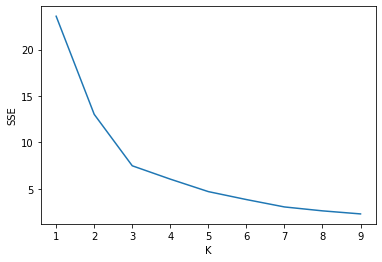

In [ ]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Age', 'Income']])
  sse.append(km.inertia_) #inertia = tingkat eror, makin kecil makin bagus

sns.lineplot(x='K', y='SSE', data=pd.DataFrame({'K' : k_rng, 'SSE' : sse}))

In [ ]:
km = KMeans(n_clusters=5)
y_predict = km.fit_predict(df[['Age', 'Income']])
y_predict

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 2, 2, 2, 3, 2, 2, 2,
       0, 2, 3, 2, 0, 2, 2, 2, 3, 2, 3, 2, 0, 2, 0, 2, 2, 2, 3, 2, 0, 2,
       0, 2, 0, 2, 2, 2, 0, 2, 2, 3, 0, 0, 0, 3, 2, 0, 3, 2, 3, 0, 3, 2,
       0, 3, 2, 2, 3, 0, 3, 3, 3, 1, 0, 0, 1, 0, 3, 0, 3, 0, 1, 0, 0, 1,
       1, 0, 3, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 3, 1, 0, 1, 3, 0, 3, 3,
       3, 1, 0, 1, 1, 1, 3, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 3, 0, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 4, 0, 4,
       0, 1, 4, 1, 1, 1, 0, 1, 1, 1, 0, 4, 4, 4, 4, 4, 4, 1, 4, 4, 0, 1,
       0, 1, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4], dtype=int32)

In [ ]:
df['Cluster'] = y_predict
df.head()

,CustomerID,Gender,Age,Income,Score,Cluster
0,1,Male,0.019231,0.000000,39,2
1,2,Male,0.057692,0.000000,81,2
2,3,Female,0.038462,0.008197,6,2
3,4,Female,0.096154,0.008197,77,2
4,5,Female,0.250000,0.016393,40,2


In [ ]:
df_segm_analysis = df[['Age', 'Income']].groupby(df.Cluster).mean()
df_segm_analysis

,Age,Income
Cluster,,
0,0.560595,0.369162
1,0.164103,0.454098
2,0.176282,0.119633
3,0.865385,0.259368
4,0.358173,0.700051


In [ ]:
# 1 Supir
# 3 Pensiunan
# 4 Direktur
# 2 Karyawan
# 0 OB

df['Labels'] = df['Cluster'].map({
    0: 'OB',
    1: 'Supir',
    2: 'Karyawan',
    3: 'Pensiunan',
    4: 'Direktur'
})

df

,CustomerID,Gender,Age,Income,Score,Cluster,Labels
0,1,Male,0.019231,0.000000,39,2,Karyawan
1,2,Male,0.057692,0.000000,81,2,Karyawan
2,3,Female,0.038462,0.008197,6,2,Karyawan
3,4,Female,0.096154,0.008197,77,2,Karyawan
4,5,Female,0.250000,0.016393,40,2,Karyawan
...,...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,79,4,Direktur
196,197,Female,0.519231,0.909836,28,4,Direktur
197,198,Male,0.269231,0.909836,74,4,Direktur
198,199,Male,0.269231,1.000000,18,4,Direktur


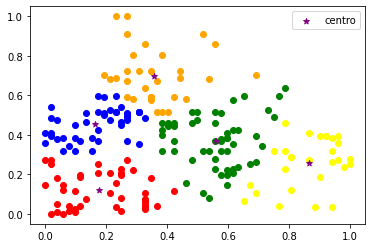

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]

plt.scatter(df1.Age, df1.Income, color='green')
plt.scatter(df2.Age, df2.Income, color='blue')
plt.scatter(df3.Age, df3.Income, color='red')
plt.scatter(df4.Age, df4.Income, color='yellow')
plt.scatter(df5.Age, df5.Income, color='orange')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centro')
plt.legend()

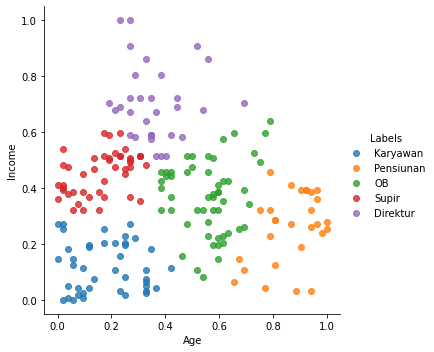

In [ ]:
sns.lmplot(x='Age', y='Income', data=df, fit_reg=False, hue='Labels')
plt.show()

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(df['Cluster'], km.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       1.00      1.00      1.00        52
           2       1.00      1.00      1.00        45
           3       1.00      1.00      1.00        29
           4       1.00      1.00      1.00        32

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



In [ ]:
import pickle
filename = 'sample_data/brain_user_mall.sav'
pickle.dump(km, open(filename, 'wb'))

In [ ]:
kmeans = pickle.load(open(filename, 'rb'))
kmeans

KMeans(n_clusters=5)

# Bayesian

In [ ]:
x = df[['Income', 'Score']]
y = df[['Cluster']]

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
GNB = GaussianNB()
GNB.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = GNB.predict(x_test)
y_pred

array([0, 2, 2, 4, 0, 2, 4, 0, 0, 2, 0, 2, 0, 1, 0, 0, 0, 0, 0, 4, 1, 1,
       0, 0, 0, 0, 1, 2, 3, 4, 1, 2, 0, 0, 2, 4, 1, 4, 2, 4, 4, 2, 2, 1,
       0, 0, 0, 4, 0, 0, 2, 2, 0, 1, 2, 0, 4, 0, 0, 3], dtype=int32)

In [ ]:
data = [[0.6, 0.1]]
GNB.predict(data)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  "X does not have valid feature names, but"


array([4], dtype=int32)

# Latihan Income - Score
-Tentukan segmentasi
-Buat model
  pake n_kluster
-Simpan modelnya

In [ ]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income'] = scaler.transform(df[['Income']])

scaler.fit(df[['Score']])
df['Score'] = scaler.transform(df[['Score']])

In [ ]:
df

,CustomerID,Gender,Age,Income,Score,Cluster,Labels
0,1,Male,0.019231,0.000000,0.387755,0,OB
1,2,Male,0.057692,0.000000,0.816327,0,OB
2,3,Female,0.038462,0.008197,0.051020,0,OB
3,4,Female,0.096154,0.008197,0.775510,0,OB
4,5,Female,0.250000,0.016393,0.397959,0,OB
...,...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,4,Direktur
196,197,Female,0.519231,0.909836,0.275510,4,Direktur
197,198,Male,0.269231,0.909836,0.744898,4,Direktur
198,199,Male,0.269231,1.000000,0.173469,4,Direktur


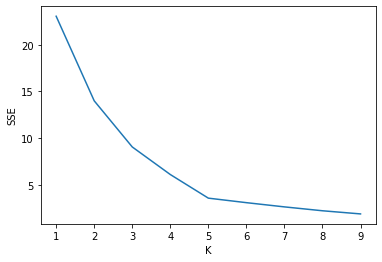

In [ ]:
sse = []
k_rng = range(1, 10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Income', 'Score']])
  sse.append(km.inertia_)

sns.lineplot(x='K', y='SSE', data=pd.DataFrame({'K' : k_rng, 'SSE' : sse}))

In [ ]:
km = KMeans(n_clusters=5)
y_predict = km.fit_predict(df[['Income', 'Score']])
y_predict

array([3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2,
       3, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 0, 4, 2, 4, 0, 4, 0, 4,
       2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4], dtype=int32)

In [ ]:
df['Cluster'] = y_predict
df.head()

,CustomerID,Gender,Age,Income,Score,Cluster,Labels
0,1,Male,0.019231,0.000000,0.387755,3,OB
1,2,Male,0.057692,0.000000,0.816327,1,OB
2,3,Female,0.038462,0.008197,0.051020,3,OB
3,4,Female,0.096154,0.008197,0.775510,1,OB
4,5,Female,0.250000,0.016393,0.397959,3,OB


In [ ]:
df_segm_analysis = df[['Income', 'Score']].groupby(df.Cluster).mean()
df_segm_analysis

,Income,Score
Cluster,,
0,0.600000,0.164431
1,0.087928,0.799629
2,0.330298,0.495087
3,0.092659,0.203194
4,0.586381,0.827839


In [ ]:
# 1 Bawang merah
# 3 Bawang putih
# 4 Bawang bombay
# 2 Telur
# 0 Cabe

df['Labels'] = df['Cluster'].map({
    0: 'Cabe',
    1: 'Bawang merah',
    2: 'Telur',
    3: 'Bawang putih',
    4: 'Bawang bombay'
})

df

,CustomerID,Gender,Age,Income,Score,Cluster,Labels
0,1,Male,0.019231,0.000000,0.387755,3,Bawang putih
1,2,Male,0.057692,0.000000,0.816327,1,Bawang merah
2,3,Female,0.038462,0.008197,0.051020,3,Bawang putih
3,4,Female,0.096154,0.008197,0.775510,1,Bawang merah
4,5,Female,0.250000,0.016393,0.397959,3,Bawang putih
...,...,...,...,...,...,...,...
195,196,Female,0.326923,0.860656,0.795918,4,Bawang bombay
196,197,Female,0.519231,0.909836,0.275510,0,Cabe
197,198,Male,0.269231,0.909836,0.744898,4,Bawang bombay
198,199,Male,0.269231,1.000000,0.173469,0,Cabe


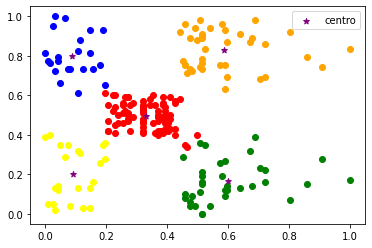

In [ ]:
df1 = df[df.Cluster == 0]
df2 = df[df.Cluster == 1]
df3 = df[df.Cluster == 2]
df4 = df[df.Cluster == 3]
df5 = df[df.Cluster == 4]

plt.scatter(df1.Income, df1.Score, color='green')
plt.scatter(df2.Income, df2.Score, color='blue')
plt.scatter(df3.Income, df3.Score, color='red')
plt.scatter(df4.Income, df4.Score, color='yellow')
plt.scatter(df5.Income, df5.Score, color='orange')

plt.scatter(km.cluster_centers_[:, 0], km.cluster_centers_[:, 1], color='purple', marker='*', label='centro')
plt.legend()

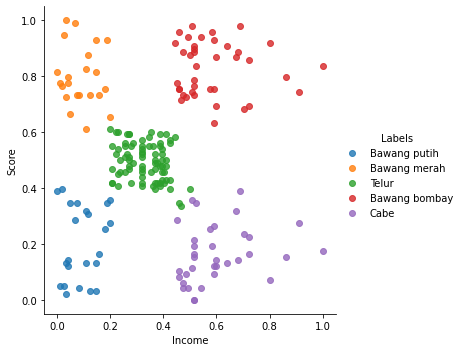

In [ ]:
sns.lmplot(x='Income', y='Score', data=df, fit_reg=False, hue='Labels')
plt.show()

In [ ]:
print(classification_report(df['Cluster'], km.labels_))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        22
           2       1.00      1.00      1.00        81
           3       1.00      1.00      1.00        23
           4       1.00      1.00      1.00        39

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200

